<a href="https://colab.research.google.com/github/natnew/Python-Projects-Analyzing-Survey-Data/blob/main/Analyze_Survey_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysing Survey Data With Python

##Data Information:
Source: https://insights.stackoverflow.com/survey
About: The data set we’re using, you can grab the 2019 StackOverflow Developer Survey results from the link above. 

We’ll start by importing a Python library called pandas, and nicknaming it pd so that we can refer to it easily in our code.

In [ ]:
import pandas as pd

We’ll use the variable name df (short for DataFrame) for our survey data.

In [4]:
df = pd.read_csv('survey_results_public.csv')



To check, let’s use another pandas method called .head(). This one will show us the first few rows of a DataFrame. 

In [5]:
df.head()



,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

Let's do a quick preview of the data to make sure everything looks correct.

In [6]:


df.shape

(9906, 85)

To maintain some privacy, I'll be adding the additional argument 1 inside the .head() parentheses so that only a single row prints in this blog post.

In [7]:
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


The value_counts() function looks at a single column of data at a time and counts how many instances of each unique entry that column contains. We will look at the survey question: “Do you think people born today will have a better life than their parents?”

In [8]:
df['BetterLife'].value_counts()

Yes    6200
No     3436
Name: BetterLife, dtype: int64

Now we know that of the 9906 respondents in our data set, 6200 think the future is looking bright.



It might be more helpful to see that represented as a percentage of the total number of responses, though

In [9]:
df['BetterLife'].value_counts(normalize=True)

Yes    0.643421
No     0.356579
Name: BetterLife, dtype: float64

We can see that roughly 64% of developers see life getting better for kids being born today, and roughly 36% think kids today are in for a similar or worse quality of life.

Let’s try the same thing on another interesting Yes/No question: “Do you believe that you need to be a manager to make more money?”

In [10]:
df['MgrMoney'].value_counts(normalize=True)

No          0.517575
Yes         0.293497
Not sure    0.188928
Name: MgrMoney, dtype: float64

Less than 30% believe they can make more money without moving into management!

Humans are visual creatures. And thankfully, it’s quite simple for us to chart the responses to these questions visually!

In [11]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20248 missing from current font.
  font.set_

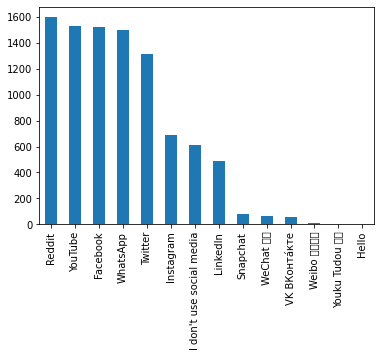

In [12]:
df['SocialMedia'].value_counts().plot(kind="bar")

This tells Python to take whatever we’ve just given it and plot the results in a bar graph. (We could replace 'bar' with 'pie' to get a pie chart instead, if we wanted).

We can make this look even better very quickly by adding a couple more arguments to that .plot() function.


An argument called figsize that defines the size of the chart in the 
form of a width and height in inches (i.e. (15,7)
An argument called color that defines the color of the bars.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20248 missing from current font.
  font.set_

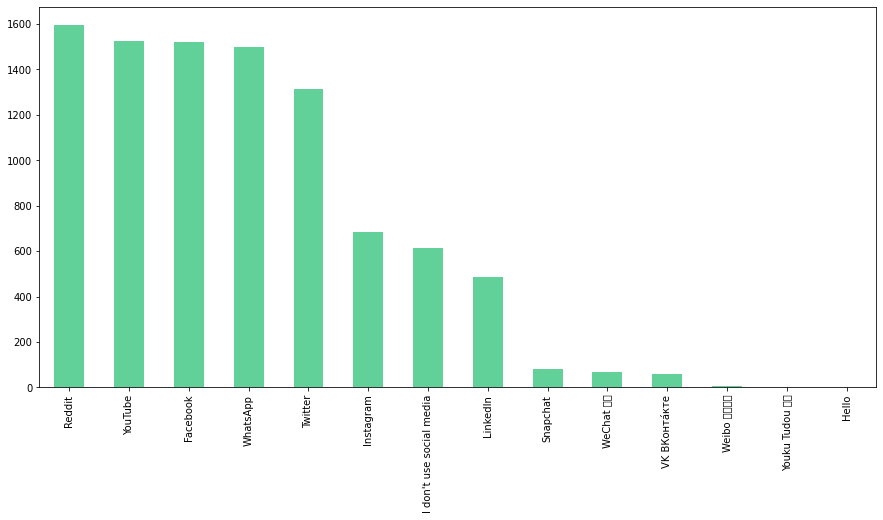

In [13]:
df['SocialMedia'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

We can find out using what’s called a Boolean to sort our data and show only the responses of people who answered ‘Yes’ or ‘No’ to that question.

We’ll create our Boolean by specifying the DataFrame and Series (i.e., column) we want to look at, and then filtering for only the responses in that Series that meet a certain criteria by using a conditional operator.

In [14]:
said_no = df[df['BetterLife'] == 'No']
said_no.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,NaN,Data or business analyst;Data scientist or mac...,13,15,3,Very satisfied,Slightly satisfied,Very confident,No,Yes,I am not interested in new job opportunities,1-2 years ago,Write any code;Complete a take-home project;In...,No,Financial performance or funding status of the...,I heard about a job opportunity (from a recrui...,CAD,Canadian dollar,40000.0,Monthly,366420.0,15.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,A little above average,No,NaN,...,MongoDB;PostgreSQL,PostgreSQL,Android;Google Cloud Platform;Linux;Windows,Android;Google Cloud Platform;Linux;Windows,NaN,NaN,Hadoop,Hadoop;Pandas;TensorFlow;Unity 3D,Android Studio;Eclipse;PyCharm;RStudio;Visual ...,Windows,I do not use containers,Not at all,NaN,No,Yes,No,YouTube,In real life (in person),Login,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ...","Just me - I am a freelancer, sole proprietor, ...","Designer;Developer, front-end",6,17,4,Slightly satisfied,Neither satisfied nor dissatisfied,NaN,NaN,NaN,"I’m not actively looking, but I am open to new...",NA - I am an independent contractor or self em...,Write any code,No,Remote work options;Opportunities for professi...,NaN,USD,United States dollar,NaN,NaN,NaN,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",Average,"Yes, because I see value in code review",6.0,...,NaN,NaN,MacOS;Windows,MacOS;Windows,React.js,React.js,NaN,NaN,PHPStorm,Windows,I do not use containers,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,No,YouTube,NaN,NaN,2014,Daily or almost daily,Find answers to specific questions,3-5 times per week,NaN,NaN,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are",Neutral,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The qualit

To confirm that this worked, we can check the size of this dataset with .shape, and compare the number of rows in said_no to the number of people who answered ‘No’ to that question, using our old friend .value_counts().



In [15]:
said_no.shape

(3436, 85)

In [16]:
df['BetterLife'].value_counts()

Yes    6200
No     3436
Name: BetterLife, dtype: int64

We can further confirm the filter has worked by running a quick value_counts() on this new dataframe:

In [17]:
said_no['BetterLife'].value_counts()

No    3436
Name: BetterLife, dtype: int64

Now that we have this dataframe containing only the ‘No’ answerers, let’s make an equivalent one for the ‘Yes’ folks and then run some comparisons.

In [18]:
said_yes = df[df['BetterLife'] == 'Yes']

Let’s see what we can determine by comparing these groups with how people answered the question about their age

In [19]:
print(said_no['Age'].mean(),
      said_yes['Age'].mean(),
      said_no['Age'].median(),
      said_yes['Age'].median()
     )

31.993948220064727 29.32853299856528 30.0 28.0


As we can see here, the pessimists tended to be slightly older, but not by a significant margin. It might be interesting to look at how specific age groups answered this question and whether that differed. If the pessimists tend to be slightly older, will we see a significant difference between the answers from devs over age 50 and under age 25, for example?

In [22]:
over50 = df[df['Age'] >= 50]
under25 = df[df['Age'] <= 25]

In [23]:
print(over50['BetterLife'].value_counts(normalize=True))
print(under25['BetterLife'].value_counts(normalize=True))

No     0.541787
Yes    0.458213
Name: BetterLife, dtype: float64
Yes    0.716287
No     0.283713
Name: BetterLife, dtype: float64


It looks like the oldest devs really are quite pessimistic, with slightly more than half of them saying that children born today won’t have a better life than their parents. Young devs, on the other hand, seem to be more optimistic than average.

It’s worth checking just how large the samples we’re dealing with here actually are

In [24]:
print(len(over50))
print(len(under25))

359
2907


Neither group is huge compared to the total datase, but both are big enough that this might represent a real split.

Let’s try this out by filtering for people who answered ‘Yes’ to the better life question and who live in India

In [25]:
filtered_1 = df[(df['BetterLife'] == 'Yes') & (df['Country'] == 'India')]

In [26]:
print(filtered_1['BetterLife'].value_counts())
print(filtered_1['Country'].value_counts())

Yes    689
Name: BetterLife, dtype: int64
India    689
Name: Country, dtype: int64


Our new DataFrame, filtered_1, contains only people in India who gave the optimistic answer about the future.

Let’s try a more complicated drill-down. We’re going to filter for only people who:

* Answered ‘Yes’ to the better life question
* Are over age 50
* Live in India
* Do NOT code as a hobby
* Contribute to open source projects at least occasionally

In [27]:
filtered = df[(df['BetterLife'] == 'Yes') & (df['Age'] >= 50) & (df['Country'] == 'India') &~ (df['Hobbyist'] == "Yes") &~ (df['OpenSourcer'] == "Never")]
filtered

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2201,2209,"I am not primarily a developer, but I write co...",No,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Taken an online course in programming or softw...,"Just me - I am a freelancer, sole proprietor, ...","Database administrator;Developer, back-end;Dev...",15,30,15,Slightly satisfied,Slightly satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,More than 4 years ago,Interview with people in senior / management r...,No,NaN,NaN,INR,Indian rupee,NaN,NaN,NaN,NaN,There's no schedule or spec; I work on what se...,NaN,"More than half, but not all, the time",Home,A little above average,"Yes, because I see value in code review",NaN,...,MariaDB;MySQL,MariaDB;MySQL,Linux;Windows,Android;Linux;MacOS,ASP.NET;Drupal,Drupal;jQuery;React.js,.NET;Node.js,Cordova;Node.js,Android Studio;Eclipse;Emacs;Notepad++;Vim;Vis...,Windows,Development;Production,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,WhatsApp,Online,Username,2008,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,11-30 minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,NaN,55.0,Man,No,Straight / Heterosexual,Black or of African descent;East Asian;Hispani...,Yes,Too long,Neither easy nor difficult
